# import lib

In [37]:
import pandas
import psycopg2
import configparser

# connect to db

In [71]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [72]:
cur=conn.cursor()

# q1

In [15]:
q1_sql = """ 
         select * from gp26.student
            """

In [16]:
df = pandas.read_sql_query(q1_sql,conn)
df[:]

,s_email,s_name,s_major
0,ia1@jmu.edu,ia smith,IA
1,aaa@jmu.edu,AAA Tates,IA
2,Cris@jmu.edu,Jordan Cris,IA
3,Rylee@jmu.edu,Cameron Rylee,IA


# q2

In [30]:
q2_sql = """
                select gp26.professor.p_name,
                gp26.course.c_name
    
    
from gp26.professor
inner join gp26.course

on gp26.professor.p_email = gp26.course.p_email """

In [31]:
df = pandas.read_sql_query(q2_sql,conn)
df[:]

,p_name,c_name
0,Noel Hendrickson,Counterfactual Reasoning
1,Orlandrew Danzell,nat sec intell
2,new_p,new_gs_name
3,new_p,counterterrorism
4,steve,seminar on Issues in Intell


# q3

In [32]:
q3_sql = """
         select c_number,
                 count(*) as enroll 
         from gp26.enroll 
         group by c_number
         order by enroll desc
            """

In [33]:
df = pandas.read_sql_query(q3_sql,conn)
df[:]

,c_number,enroll
0,313,3
1,200,3
2,300,2
3,360,2


<AxesSubplot:xlabel='c_number'>

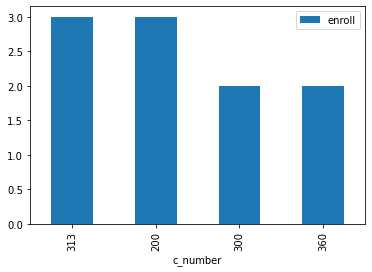

In [34]:
df.plot.bar(x= 'c_number',y='enroll')

# q4

In [20]:
q4_sql= """
        select gp26.professor.p_name,
        count (gp26.course.c_name) as teaching_number
        from gp26.professor
        inner join gp26.course
        
        on gp26.professor.p_email = gp26.course.p_email
        
        group by gp26.professor.p_name
        order by teaching_number desc
        """

In [21]:
df = pandas.read_sql_query(q4_sql,conn)
df[:]

,p_name,teaching_number
0,new_p,2
1,Noel Hendrickson,1
2,steve,1
3,Orlandrew Danzell,1


<AxesSubplot:xlabel='p_name'>

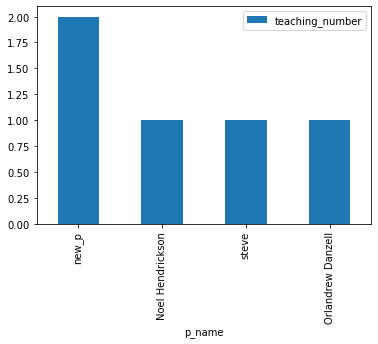

In [22]:
df.plot.bar(x= 'p_name',y='teaching_number')

# q5

In [73]:
q5_sql= """
        insert into gp26.professor(p_email,p_name,p_office)
        values('{}','{}','{}')
         """.format('steve@jmu.edu','steve','1222')

In [74]:
cur.execute(q5_sql)

IntegrityError: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(steve@jmu.edu) already exists.


In [75]:
conn.rollback()

In [51]:
conn.commit()

In [68]:
df = pandas.read_sql_query("select * from gp26.professor",conn)
df[:]

,p_email,p_name,p_office
0,hendrinx@jmu.edu,Noel Hendrickson,EnGeo 1204
1,danzelox@jmu.edu,Orlandrew Danzell,isat107
2,new_p@jmu.edu,new_p,new_office
3,steve@jmu.edu,steve,1222


In [76]:
q5_sql = """
                        insert into gp26.course(c_number,c_name,c_room,p_email)
                                values('{}','{}','{}','{}')

                                """.format ('new_lab4_c','new_lab4_n','new_lab4_r','steve@jmu.edu')
print(q5_sql)


                        insert into gp26.course(c_number,c_name,c_room,p_email)
                                values('new_lab4_c','new_lab4_n','new_lab4_r','steve@jmu.edu')

                                


In [77]:
cur.execute(q5_sql)

In [44]:
conn.rollback()

In [78]:
conn.commit()

In [80]:
df=pandas.read_sql_query('select * from gp26.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,313,Counterfactual Reasoning,12,hendrinx@jmu.edu
1,200,nat sec intell,24,danzelox@jmu.edu
2,gs_new,new_gs_name,online,new_p@jmu.edu
3,360,counterterrorism,30,new_p@jmu.edu
4,300,seminar on Issues in Intell,13,steve@jmu.edu
5,new_lab4_c,new_lab4_n,new_lab4_r,steve@jmu.edu


# q6

In [1]:
q6_sql=  """
             update gp26.course
             set p_email = 'steve@jmu.edu'
             where p_email = '{}'
             
                 """.format('marrinsp@jmu.edu')

In [6]:
cur.execute(q6_sql)

In [7]:
conn.commit()

In [9]:
df = pandas.read_sql_query("select * from gp26.course",conn)
df[:]

,c_number,c_name,c_room,p_email
0,313,Counterfactual Reasoning,12,hendrinx@jmu.edu
1,200,nat sec intell,24,danzelox@jmu.edu
2,gs_new,new_gs_name,online,new_p@jmu.edu
3,360,counterterrorism,30,new_p@jmu.edu
4,300,seminar on Issues in Intell,13,steve@jmu.edu


In [10]:
q6_sql = """
            delete from gp26.professor
            where p_email = '{}'

                """.format('marrinsp@jmu.edu')
print(q6_sql)


            delete from gp26.professor
            where p_email = 'marrinsp@jmu.edu'

                


In [11]:
cur.execute(q6_sql)

In [12]:
conn.commit()

In [13]:
df = pandas.read_sql_query("select * from gp26.professor",conn)
df[:]

,p_email,p_name,p_office
0,hendrinx@jmu.edu,Noel Hendrickson,EnGeo 1204
1,danzelox@jmu.edu,Orlandrew Danzell,isat107
2,new_p@jmu.edu,new_p,new_office
3,steve@jmu.edu,steve,1222


In [81]:
cur.close()

In [82]:
conn.close()